In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df = pd.read_csv('time_series_19-covid-Confirmed_archived_0325.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [4]:
country = df['Country/Region'].unique()
df1 = df.groupby('Country/Region').apply(sum)

In [5]:
df1 = df1.drop(['Lat','Long','Province/State','Country/Region'],axis=1)
df1 = df1.T
df1.columns = country

#### Ahora tenemos un DF en el cual no hay información dispersa de algún país en diferentes lados

In [6]:
df1.head()

,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Cambodia,Sri Lanka,Germany,...,French Guiana,Mayotte,Greenland,Guam,Guernsey,Jersey,Puerto Rico,Republic of the Congo,The Bahamas,The Gambia
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


#### Ahora vemos que paises son los que ya tienen contagios, y nos quedamos con 10, pues deben iniciar en un origen común

In [11]:
l = []
for i in range(len(df1.iloc[2,:])):
    if df1.iloc[47,i] == 2:
        l.append(country[i])
    if df1.iloc[47,i] == 3:
        l.append(country[i])
l

['Japan',
 'India',
 'Iraq',
 'Croatia',
 'Switzerland',
 'Mexico',
 'Russia',
 'United Kingdom',
 'Congo (Kinshasa)',
 'Guinea',
 'Venezuela',
 'Eswatini',
 'Chad',
 'Nicaragua',
 'Timor-Leste']

Decidimos con que paices nos quedaremos;

In [12]:
country = ['Venezuela','India','Iraq','Croatia','Switzerland','Russia','United Kingdom','Congo (Kinshasa)','Guinea','Mexico']
len(country)

10

#### Graficar el crecimiento de los casos confirmados para al menos 10 países, incluyendo México. 
Poner la información de cada país en
un origen común, comenzando desde que hay al menos un caso
confirmado como se ve en las siguientes gráficas:

In [13]:
df2 = df1[country]
df2 = pd.DataFrame(df2)
df2 = df2.iloc[47:,:]
df2.head()

,Venezuela,India,Iraq,Croatia,Switzerland,Russia,United Kingdom,Congo (Kinshasa),Guinea,Mexico
3/9/20,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0
3/10/20,2.0,3.0,5.0,2.0,2.0,5.0,5.0,2.0,3.0,3.0
3/11/20,2.0,3.0,7.0,3.0,2.0,7.0,6.0,3.0,5.0,6.0
3/12/20,2.0,3.0,11.0,3.0,2.0,19.0,6.0,3.0,6.0,6.0
3/13/20,2.0,3.0,13.0,5.0,2.0,34.0,12.0,3.0,7.0,14.0


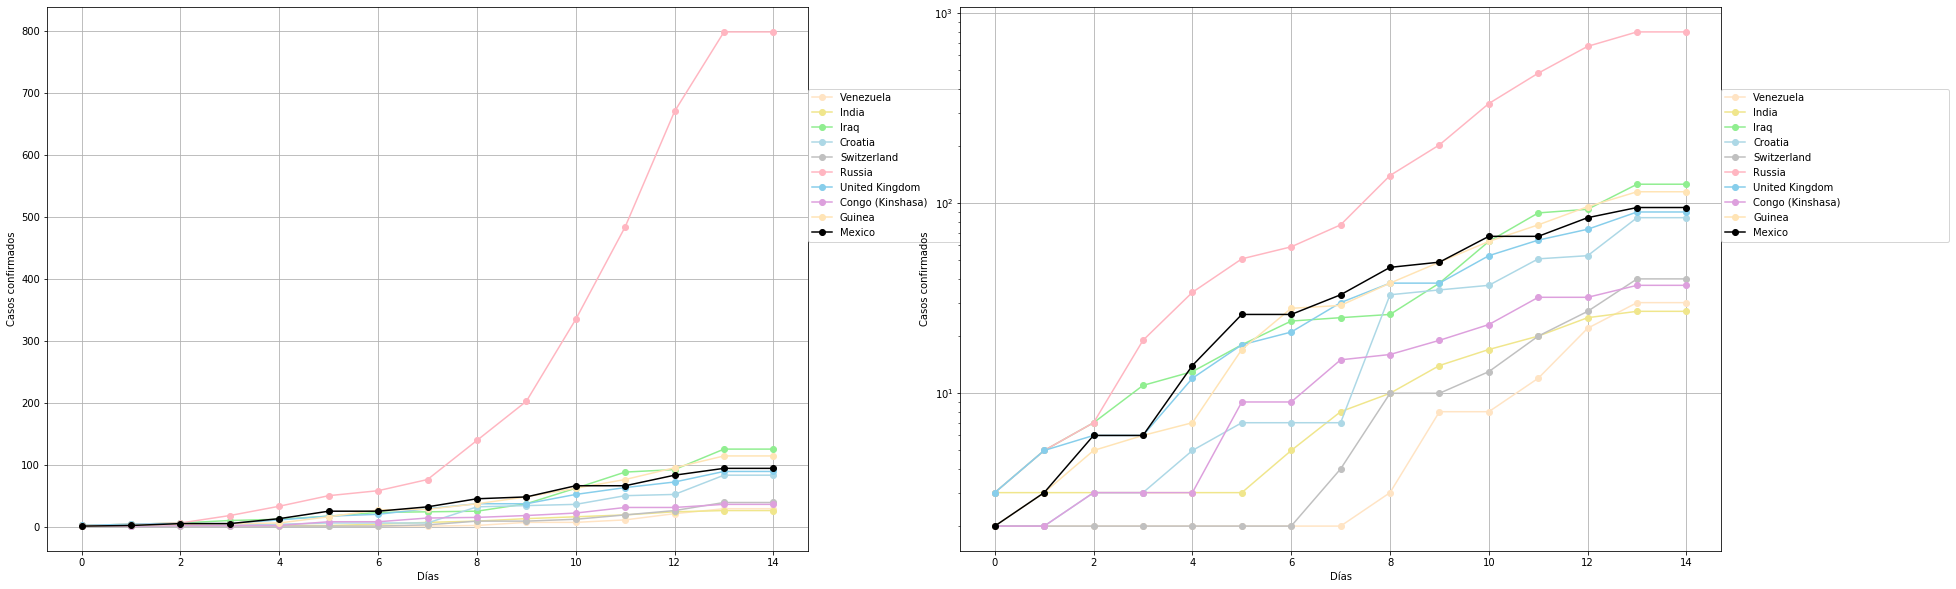

In [14]:
X = range(len(df2.iloc[:,0]))
colors = ['bisque','khaki','lightgreen','lightblue','silver',
          'lightpink','skyblue','plum','moccasin','black']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
c = 0
for g in axes:
    for i in range(len(country)):
        g.plot(X, df2.iloc[:,i], '-bo', color = colors[i], 
                label = country[i])
        g.legend(bbox_to_anchor = (1, -0.15, 0.3, 1), loc = 1, ncol = 1, mode="expand", borderaxespad = 0)
        g.grid(True)
        g.set_xlabel('Días')
        g.set_ylabel('Casos confirmados')
        if c == 1:
            g.set_yscale('log')
    c += 1

<function matplotlib.pyplot.show(*args, **kw)>

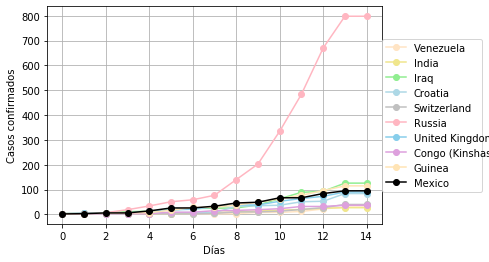

In [15]:
for i in range(len(country)):
    plt.plot(X, df2.iloc[:,i], '-bo', color = colors[i], 
                label = country[i])
    plt.legend(bbox_to_anchor = (1, -0.15, 0.3, 1), loc = 1, ncol = 1, mode="expand", borderaxespad = 0)
    plt.grid(True)
    plt.xlabel('Días')
    plt.ylabel('Casos confirmados')
plt.show

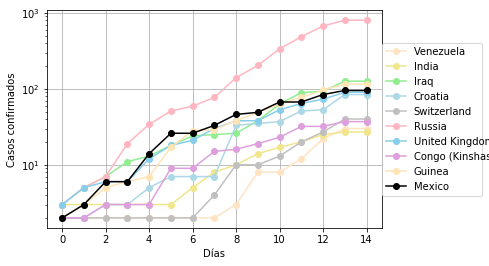

In [16]:
for i in range(len(country)):
    plt.plot(X, df2.iloc[:,i], '-bo', color = colors[i], 
                label = country[i])
    plt.legend(bbox_to_anchor = (1, -0.15, 0.3, 1), loc = 1, ncol = 1, mode="expand", borderaxespad = 0)
    plt.grid(True)
    plt.xlabel('Días')
    plt.ylabel('Casos confirmados')
plt.yscale('log')
plt.show()

#### Elegir un país y ajustar el modelo:
Calcular $(E + 1)$ usando la información publicada por la Johns
Hopkins CSSE. Determinar a partir de cuántos casos el modelo
ajusta mejor durante los primeros días.

$I_n:$ cantidad de confirmados con COVID-19 en el día $n$

$I_{n+1}:$ cantidad de confirmados con COVID-19 en el día $n+1$

$\Delta I_{n}:$ incremento en la cantidad de confirmados con COVID-19
del día $n$ al día $n+1$

Suponga que el incremento en la cantidad de confirmados, $\Delta I_{n}$ , para el
día siguiente $(n + 1)$ es proporcional a la cantidad de confirmados del
día de hoy $(n)$, es decir:

$$\Delta I_{n} = E * I_{n}$$

donde $\Delta I_{n} = I_{n+1} -I_n$ . Sustituyendo esta relación en la ecuación de
arriba y rearreglando obtenemos:

$$I_{n+1}=I_n * (E+1)$$

Observaciones:

1. Se cumple $1 \leq E+1$
2. Cuando $E = 0$ se tiene que $I_{n+1} = I_n$ por lo que no habrá incremento en el día siguiente.
3. Cuando $E = 1$ se tiene que $I_{n+1} = 2 ∗ I_n$ por lo que el incremento será del doble al día siguiente.
4. Se puede ver que $E+1 = \frac{I_{n+1}}{I_n}$, por lo tanto, si tenemos información de $I_n$ e $I_{n+1}$ entonces es posible conocer el valor de $(E + 1)$ para día $n + 1$.

In [17]:
def model(pais, df, country, x):
    # x cantidad de valores que queremos del modelo
    # pais al que queremos ajustar
    
    valores = df.loc[:,pais]
    ind = min(np.where(valores >= 20)[0])
    m = country.index(pais)
    In = df.iloc[ind, m]
    In1 = df.iloc[ind + 1, m]
    v = valores.iloc[ind:-1]
    E = []
    E.append(In1/In)
    
    c = 2
    for i in range(len(v)-2):
        In = In1
        In1 = v.iloc[c]
        E.append(In1/In)
        c += 1
    suma = sum(E)
    e1 = suma/len(E)
    
    modelo = []
    In = df.iloc[ind, m]
    modelo.append(In)
    
    for i in range(0, x + 1):
        In = modelo[i-1]
        modelo.append(In*e1)
        
    return(modelo, e1)

/home/kenia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


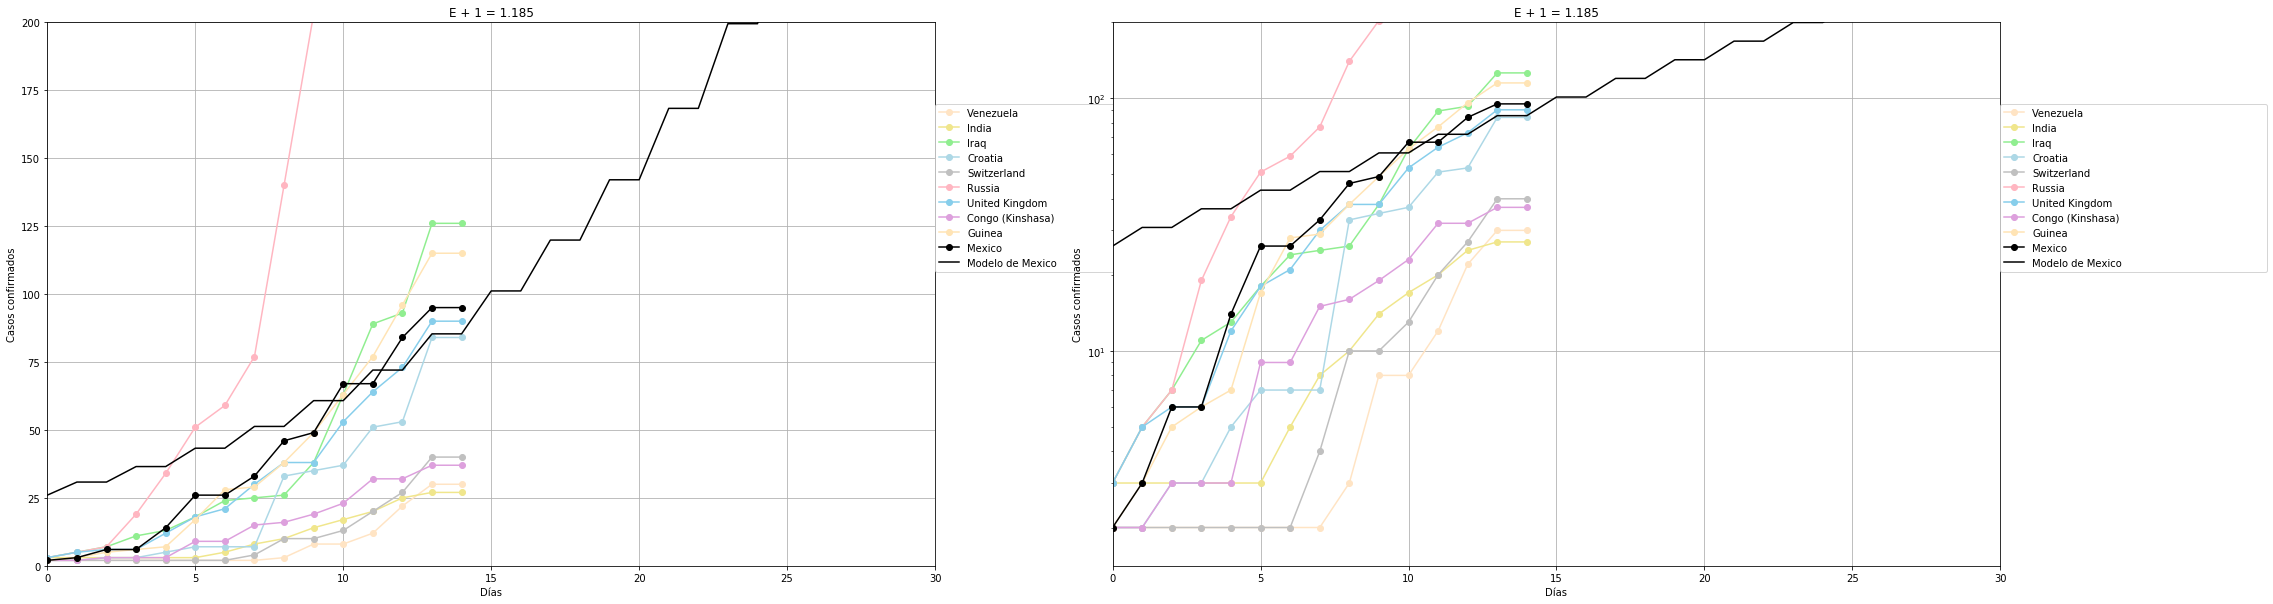

In [28]:
X = range(len(df2.iloc[:,0]))
pais = 'Mexico'
colors = ['bisque','khaki','lightgreen','lightblue','silver',
          'lightpink','skyblue','plum','moccasin','black']
country = ['Venezuela','India','Iraq','Croatia','Switzerland','Russia','United Kingdom','Congo (Kinshasa)',
           'Guinea','Mexico']
x = 50
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (35, 10))
c = 0
(m, e) = model(pais, df2, country, x)
for g in axes:
    for i in range(len(country)):
        g.plot(X, df2.iloc[:,i], '-bo', color = colors[i], label = country[i])
        if c == 1:
            g.set_yscale('log')
    c += 1
    g.plot(range(x + 2), m, 'b-', color = 'black', label = 'Modelo de Mexico')
    g.grid(True)
    g.set_xlabel('Días')
    g.set_ylabel('Casos confirmados')
    g.set_title('E + 1 = '+ str(np.round(e, 3)))
    g.legend(bbox_to_anchor = (1, -0.15, 0.3, 1), loc = 1, ncol = 1, mode="expand", borderaxespad = 0)
    g.set_ylim([0,200])
    g.set_xlim([0,30])
    

<function matplotlib.pyplot.show(*args, **kw)>

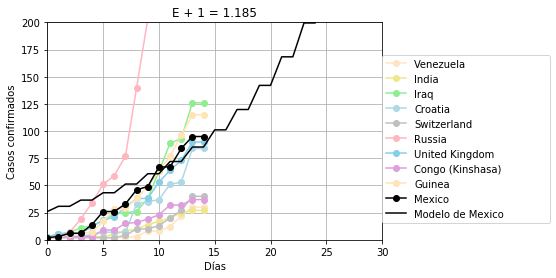

In [27]:
for i in range(len(country)):
    plt.plot(X, df2.iloc[:,i], '-bo', color = colors[i], 
                label = country[i])
plt.plot(range(x + 2), m, 'b-', color = 'black', label = 'Modelo de Mexico')
plt.legend(bbox_to_anchor = (1, -0.15, 0.5, 1), loc = 1, ncol = 1, mode="expand", borderaxespad = 0)
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Casos confirmados')
plt.title('E + 1 = '+ str(np.round(e, 3)))
plt.ylim([0, 200])
plt.xlim([0, 30])
plt.show

/home/kenia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


<function matplotlib.pyplot.show(*args, **kw)>

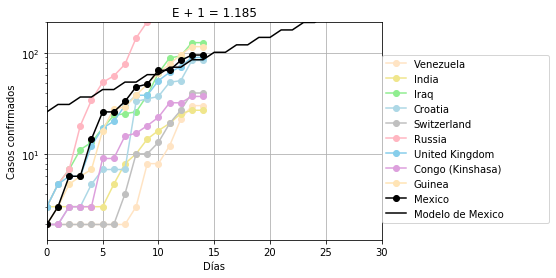

In [29]:
for i in range(len(country)):
    plt.plot(X, df2.iloc[:,i], '-bo', color = colors[i], 
                label = country[i])
plt.plot(range(x + 2), m, 'b-', color = 'black', label = 'Modelo de Mexico')
plt.legend(bbox_to_anchor = (1, -0.15, 0.5, 1), loc = 1, ncol = 1, mode="expand", borderaxespad = 0)
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Casos confirmados')
plt.title('E + 1 = '+ str(np.round(e, 3)))
plt.yscale('log')
plt.ylim([0, 200])
plt.xlim([0, 30])
plt.show